In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../../1_dock')
sys.path.append('../../3_analyze')
sys.path.append('../../ifp')
sys.path.append('../../mcss')
from containers import Protein
from shared_paths import shared_paths

assert shared_paths['docking'] == 'confgen_es4'

In [16]:
datasets = [d for d in sorted(os.listdir(shared_paths['data']))
            if d[0] != '.' and d[-3:] != 'old']

In [17]:
data = {}
for i, d in enumerate(datasets):
    print(i, d)
    protein = Protein(d, struct = 'Last')
    lm = protein.lm
    ligands = lm.docked(lm.pdb)[:20]
    print ligands
    try:
        protein.load_docking(ligands, False, False, False)
    except:
        continue
    crystal_lig = "{}_lig".format(lm.st)
    for ligand in ligands:
        if ligand == crystal_lig: continue
        rmsds = [pose.rmsd for pose in protein.docking[lm.st].ligands[ligand].poses]
        if d not in data: data[d] = {}
        data[d][ligand] = rmsds

(0, '5HT2B')
missing molw file
missing macrocycle file
missing duplicates file
duplicates not loaded
['6DS0_lig', '6DRZ_lig', '6DRY_lig', '6DRX_lig', '5TVN_lig', '4IB4_lig']
(1, 'A2AR')
['5UIG_lig', '5OLV_lig', '5OLO_lig', '5OLH_lig', '5N2R_lig', '5MZJ_lig', '5IUB_lig', '5IUA_lig', '5IU8_lig', '5IU7_lig', '4UHR_lig', '3UZC_lig', '3UZA_lig', '3RFM_lig', '3REY_lig', '3QAK_lig', '3EML_lig', '2YDV_lig', '2YDO_lig']
(2, 'AR')
['5V8Q_lig', '5T8J_lig', '5T8E_lig', '5CJ6_lig', '4QL8_lig', '3V49_lig', '2HVC_lig', '2AX9_lig', '2AMB_lig', '2AM9_lig', '1T5Z_lig', '1E3G_lig']
(3, 'B1AR')
['5A8E_lig', '4BVN_lig', '4AMJ_lig', '4AMI_lig', '3ZPR_lig', '3ZPQ_lig', '2YCZ_lig', '2YCW_lig', '2Y04_lig', '2Y03_lig', '2Y02_lig', '2Y01_lig']
(4, 'B2AR')
['5X7D_lig', '4LDO_lig', '4LDL_lig', '4LDE_lig', '3NYA_lig', '3NY9_lig', '3NY8_lig', '3D4S_lig']
(5, 'BACE1')
['4HA5_lig', '4H3J_lig', '4H3G_lig', '4H3F_lig', '4GID_lig', '4FSL_lig', '4FS4_lig', '4FM8_lig', '4FM7_lig', '4DJY_lig', '4DJX_lig', '4DJW_lig', '4DJV_

In [18]:
print len(data)
print sum([len(v) for k, v in data.items()])
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print count, key

33
431
1 CHRM3
1 SIGMAR1
1 TRPV1
2 GLUT1
4 DAT
4 MGLUR5
4 SLC6A4
5 5HT2B
6 SMO
7 B2AR
11 AR
11 B1AR
11 PLK1
13 F11
15 NR3C2
16 BRD4
16 NR3C1
18 A2AR
19 BACE1
19 BRAF
19 CDK2
19 CHK1
19 ERA
19 F10
19 F2
19 HSP90AA1
19 JAK2
19 MEK1
19 P00760
19 PDE10A
19 PLAU
19 PYGM
19 VDR


(array([  32.,   12.,    3.,   20.,   21.,   21.,   25.,   35.,   70.,  192.]),
 array([   1. ,   30.9,   60.8,   90.7,  120.6,  150.5,  180.4,  210.3,
         240.2,  270.1,  300. ]),
 <a list of 10 Patch objects>)

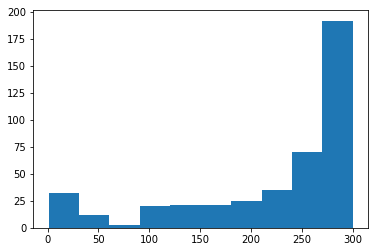

In [19]:
lengths = [len(rmsds)
           for prot, ligands in data.items()
           for ligand, rmsds in ligands.items()]
plt.hist(lengths)

# Glide performance for all ligands

In [20]:
def percentage_native(rmsds, poses = 1, thresh = 2.0):
    hit, total = 0.0, 0.0
    for rmsd in rmsds:
        if None in rmsd: continue
        hit   += any(rmsd[:poses] < thresh)
        total += 1
    return hit / total

class Table:
    def __init__(self, columns):
        self.columns = columns
    
    def __call__(self, data):
        s = ''
        for width, d in zip(self.columns, data):
            d = str(d)[:width-1]
            s += str(d).ljust(width, ' ')
        print s

def performance(rmsds):

    POSE = [0, 1, 3, 10, 30, 100, 300]
    THRESH = [1, 1.5, 2, 2.5, 3, 3.5, 4, 8]

    for thresh in THRESH:
        Y = [percentage_native(rmsds, poses, thresh)
             for poses in POSE]
        plt.plot(Y, label = "< {} rmsd".format(thresh))
    plt.xticks(range(len(POSE)),POSE)
    plt.legend(loc = 4)
    plt.ylabel('Fraction Correct')
    plt.xlabel('Number of Poses Considered')
    plt.title('All Proteins')
    plt.ylim(0, 1)
    plt.xlim(0, len(POSE)-1)
    plt.show()

    # Table
    potential = Table([10]*4)
    potential(['RMSD', 'top 1', 'top 100', 'Potential'])

    for thresh in THRESH:
        potential([thresh,
                   percentage_native(rmsds, 1, thresh),
                   percentage_native(rmsds, 100, thresh), 
                   percentage_native(rmsds, 100, thresh) - percentage_native(rmsds, 1, thresh)
                  ])

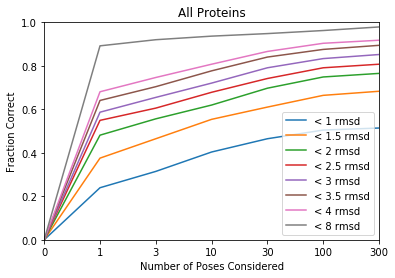

RMSD      top 1     top 100   Potential 
1         0.2394366 0.5046948 0.2652582 
1.5       0.3755868 0.6643192 0.2887323 
2         0.4812206 0.7488262 0.2676056 
2.5       0.5492957 0.7910798 0.2417840 
3         0.5868544 0.8333333 0.2464788 
3.5       0.6408450 0.8755868 0.2347417 
4         0.6807511 0.9037558 0.2230046 
8         0.8920187 0.9624413 0.0704225 


In [21]:
rmsds = [np.array(rmsds)
         for prot, ligands in data.items()
         for ligand, rmsds in ligands.items()]
performance(rmsds)

# Glide performance averaged over targets

In [22]:
def target_performance(top1, top100, labels):
    print 'Top pose is correct', sum(top1) / float(len(top1))
    print 'Top 100 has one correct', sum(top100) / float(len(top100))

    markers = ['o', 'v', 'x', 's']
    f, ax = plt.subplots()
    for i, (_x, _y, _label) in enumerate(zip(top1, top100, labels)):
        plt.scatter(_x, _y, marker = markers[i/10], label = _label)
    plt.xlabel('Top 1', fontsize = 16)
    plt.ylabel('Top 100', fontsize = 16)
    plt.plot(range(2), linestyle='--', c = 'k')
    plt.title('Fraction Near-Native', fontsize = 20)
    ax.set_aspect('equal', 'box')
    plt.legend(bbox_to_anchor=(1.1, 1.05), ncol=2)
    plt.show()

Top pose is correct 0.475075228591
Top 100 has one correct 0.743322633598


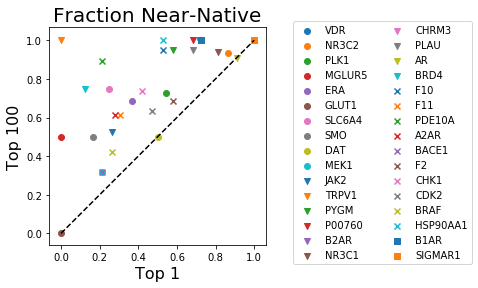

In [25]:
# GScore
top1, top100, labels = [], [], []
for prot, ligands in data.items():
    if prot == '5HT2B': continue
    rmsds = [np.array(rmsds)
             for ligand, rmsds in ligands.items()]
    top1   += [percentage_native(rmsds, 1, 2.0)]
    top100 += [percentage_native(rmsds, 100, 2.0)]
    labels += [prot]
target_performance(top1, top100, labels)

# Performance by type

5TH2B
GRM5
MAPK14
PTPN1


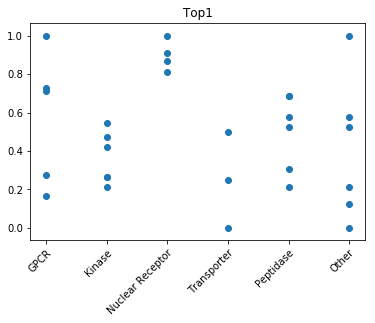

5TH2B
GRM5
MAPK14
PTPN1


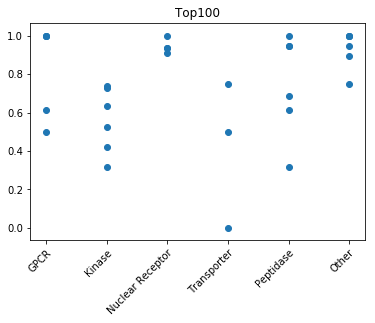

5TH2B
GRM5
MAPK14
PTPN1


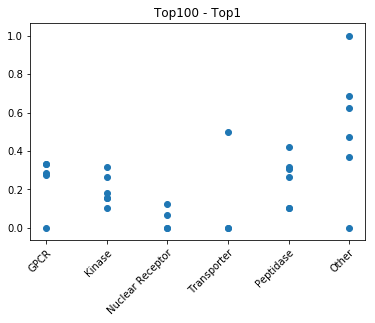

In [51]:
family = {
    'GPCR': ['5TH2B', 'A2AR', 'B1AR', 'B2AR', 'CHRM3', 'GRM5', 'SMO'],
    'Kinase': ['BRAF', 'CDK2', 'CHK1', 'JAK2', 'PLK1', 'MAPK14', 'MEK1'],
    'Transporter': ['SLC6A4', 'GLUT1', 'DAT'],
    'Nuclear Receptor': ['NR3C2', 'NR3C1', 'AR', 'VDR'],
    'Peptidase': ['F2', 'F10', 'F11', 'PLAU', 'P00760', 'BACE1'],
    'Other': ['PYGM', 'PTPN1', 'BRD4', 'HSP90AA1', 'PDE10A', 'SIGMAR1', 'TRPV1']
}
def plot(n1, n2, title):
    order = ['GPCR', 'Kinase', 'Nuclear Receptor', 'Transporter', 'Peptidase', 'Other']
    performance = []
    for name in order:
        performance += [[]]
        for member in family[name]:
            if member in data:
                performance[-1] += [percentage_native([np.array(rmsds) for ligand, rmsds in data[member].items()], n1, 2.0)
                                    - percentage_native([np.array(rmsds) for ligand, rmsds in data[member].items()], n2, 2.0)]
            else:
                print member

    x = [_x for i, p in enumerate(performance) for _x in [i] * len(p)]
    y = [_y for p in performance for _y in p]
    plt.scatter(x, y)
    plt.xticks(range(len(order)), order, rotation = 45, ha='right', rotation_mode='anchor')
    plt.title(title)
    plt.show()
plot(1, 0, 'Top1')
plot(100, 0, 'Top100')
plot(100, 1, 'Top100 - Top1')